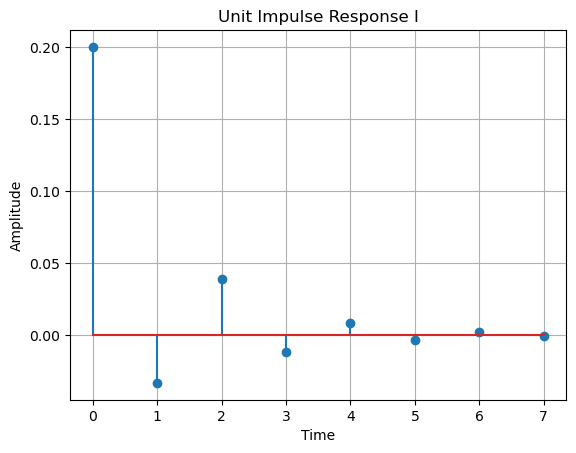

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as scipy
from scipy import signal
n = np.arange(0,8)
delta = signal.unit_impulse(8)
a = [1,1/6,-1/6]
b = [1/5,0,0]
h = signal.lfilter(b,a,delta)
plt.stem(n,h)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Unit Impulse Response I")
plt.grid()

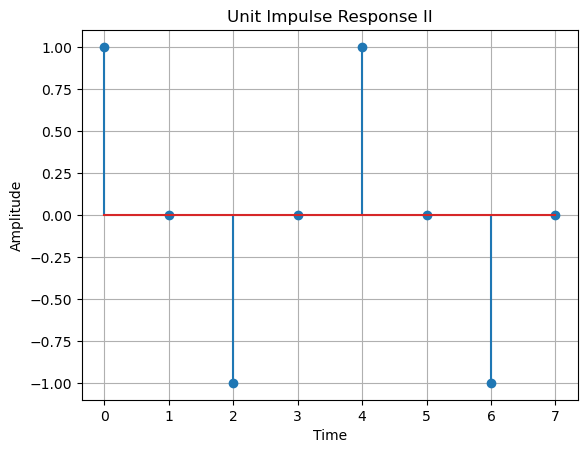

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as scipy
from scipy import signal
n = np.arange(0,8)
delta = signal.unit_impulse(8)
a = [1,0,1/1]
b = [1,0,0]
h = signal.lfilter(b,a,delta)
plt.stem(n,h)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Unit Impulse Response II")
plt.grid()

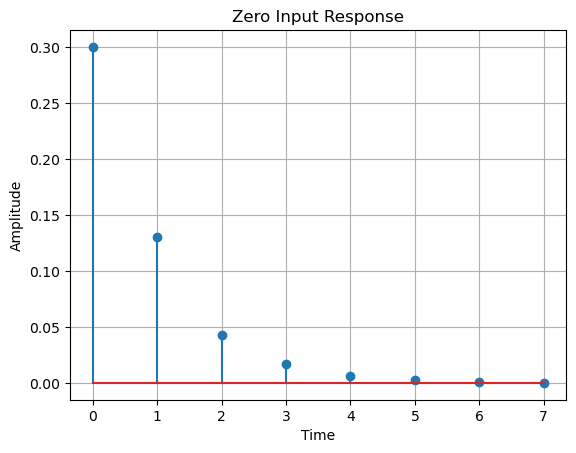

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, lfiltic
#NOTE My D value is = 0
N = 8; D = 0
a = [1,-(D+1)/10,-0.1]
b = [2,0,0]
zi = lfiltic(b, a, [1, 2])
u = np.zeros(N)
y,zo = lfilter(b, a, u, zi=zi)
plt.stem(y)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Zero Input Response")
plt.grid()

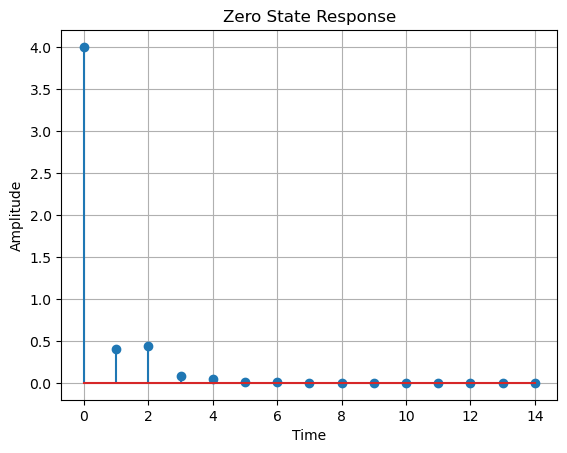

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, lfiltic, unit_impulse
def u(a, n):
    unit = np.array([])
    for sample in n:
        if sample<a:
            unit = np.append(unit,0)
        else:
            unit = np.append(unit,1)
    return(unit)
#NOTE My D value is = 0
D = 0; n = np.arange(0,15)
a = [1,-(D+1)/10,-0.1]
b = [2,0,0]
x = 2*np.cos((2*np.pi*n)/(D+1))*(u(0,n)-u((D+1),n))
y = lfilter(b,a,x)
plt.figure(2)
plt.stem(n,y)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Zero State Response")
plt.grid()

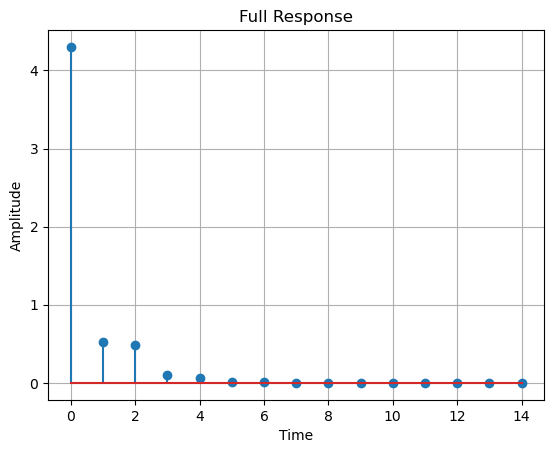

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, lfiltic
def u(a, n):
    unit = np.array([])
    for sample in n:
        if sample<a:
            unit = np.append(unit,0)
        else:
            unit = np.append(unit,1)
    return(unit)
#NOTE My D value is = 0
D = 0; n = np.arange(0,15)
a = [1,-(D+1)/10,-0.1]
b = [2,0,0]
x = 2*np.cos((2*np.pi*n)/(D+1))*(u(0,n)-u((D+1),n))
zi = lfiltic(b,a,[1,2])
y,zi = lfilter(b,a,x,zi=zi)
plt.stem(n,y)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Full Response")
plt.grid()

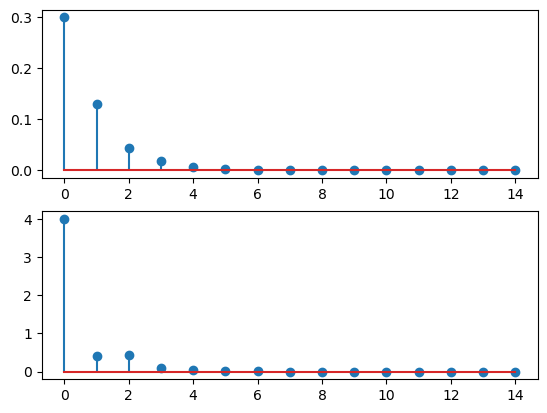

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, lfiltic
def u(a, n):
    unit = np.array([])
    for sample in n:
        if sample<a:
            unit = np.append(unit,0)
        else:
            unit = np.append(unit,1)
    return(unit)
#NOTE My D value is = 0
D = 0; n = np.arange(0,15)
a = [1,-(D+1)/10,-0.1]
b = [2,0,0]
u1 = np.zeros(15)
zi = lfiltic(b,a,[1,2])
y1,zo = lfilter(b, a, u1, zi=zi) #ZERO INPUT RESPONSE
x = 2*np.cos((2*np.pi*n)/(D+1))*(u(0,n)-u((D+1),n)) 
y2 = lfilter(b,a,x) # ZERO STATE RESPONSE
fig, (ax1, ax2) = plt.subplots(2)
ax1.stem(n,y1);
ax2.stem(n,y2);

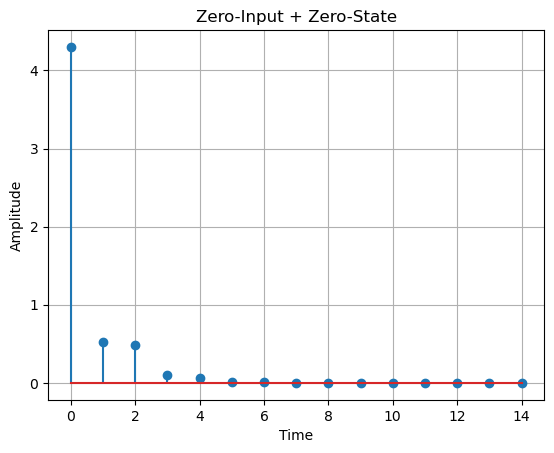

In [7]:
# ZERO INPUT + ZERO
y = y1 + y2
plt.stem(y)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Zero-Input + Zero-State")
plt.grid()

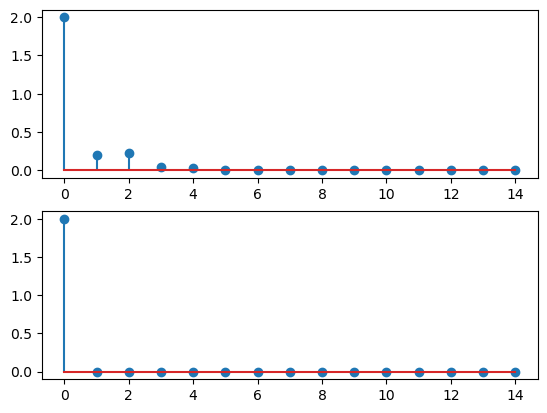

In [19]:
import numpy as np
from numpy import zeros
import matplotlib.pyplot as plt
from scipy.signal import lfilter, lfiltic, lfilter_zi, convolve, unit_impulse
def u(a, n):
    unit = np.array([])
    for sample in n:
        if sample<a:
            unit = np.append(unit,0)
        else:
            unit = np.append(unit,1)
    return(unit)
#NOTE My D value is = 0
D = 0; n = np.arange(0,15)
a = [1,-(1+D)/10,-0.1]
b = [2,0,0]
h = lfilter(b,a,unit_impulse(15)) #ZERO STATE RESPONSE
x = 2*np.cos((2*np.pi*n)/(D+1))*(u(0,n)-u((D+1),n)) #INPUT
fig, (ax1, ax2) = plt.subplots(2)
ax1.stem(n,h);
ax2.stem(n,x);

<StemContainer object of 3 artists>

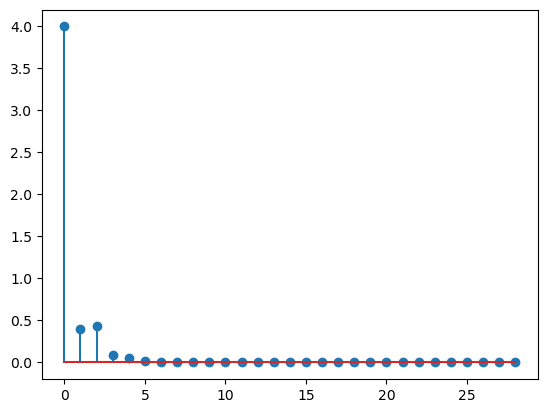

In [20]:
y = convolve(x,h)
plt.stem(y)

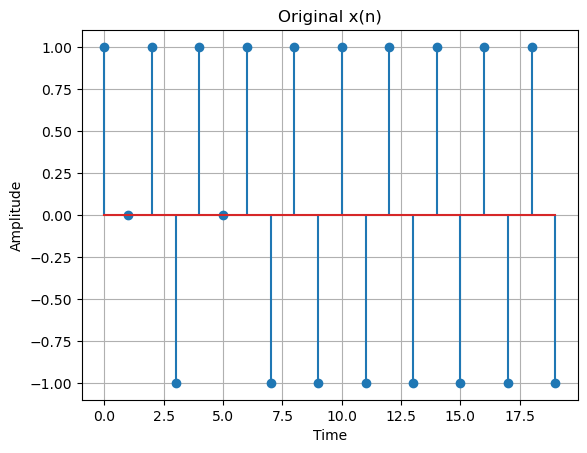

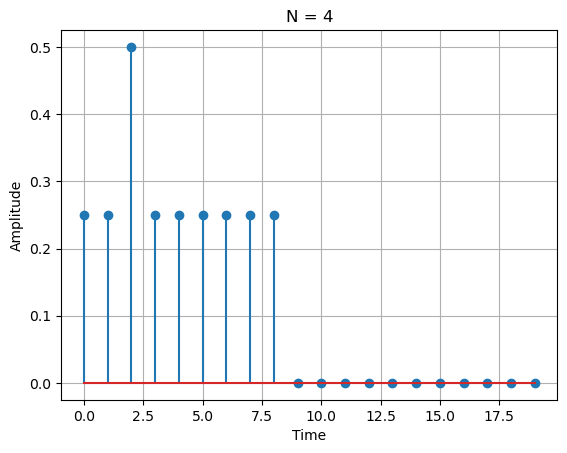

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter_zi, lfiltic, convolve,lfilter, unit_impulse 
#NOTE My D value is = 0
n = np.arange(0,20); D = 0;G = 4; H =0
def moving_average_filter_parameters(N):
    # y(n) = 1/N * (x(n)+ x(n-1)+ x(n-2)+ ... + x(n-(N-1)))
    # Since h(n) = (u(n) - u(n-N)) / N, 'b' will be a value of '1/N' from 0-->N 
    b = np.ones(N) / N # x(n)
    a = 1 # y(n)
    return b, a
def moving_average_filter(N):
    b,a = moving_average_filter_parameters(N)
    x = np.cos((np.pi * n)/(D + 1)) + (unit_impulse(20,(G+1))
                                      + unit_impulse(20,(H+1)))

    h = lfilter(b, a, x)
    return h


plt.figure(0)
plt.stem(np.cos((np.pi * n)/(D + 1)) + (unit_impulse(20,(G+1)) 
                                       + unit_impulse(20,(H+1))))
plt.xlabel("Time") 
plt.ylabel("Amplitude") 
plt.title("Original x(n)") 
plt.grid()
plt.figure(1)
plt.stem(moving_average_filter(4))
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("N = 4")
plt.grid()

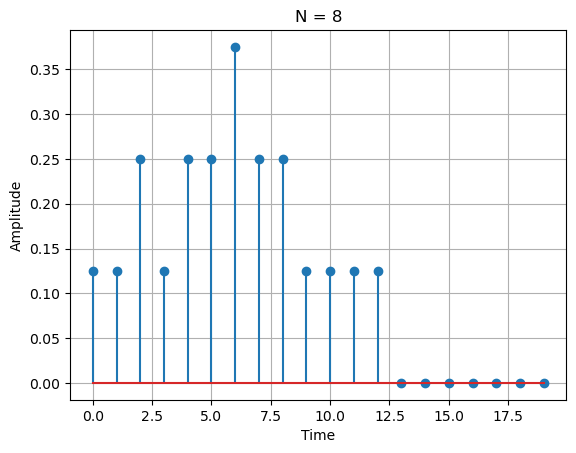

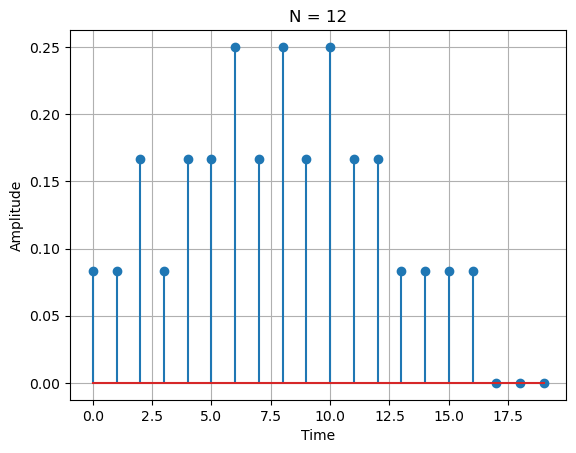

In [18]:
plt.figure(2)
plt.stem(moving_average_filter(8))
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("N = 8")
plt.grid()
plt.figure(3)
plt.stem(moving_average_filter(12))
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("N = 12")
plt.grid()